<h2 align="center">SMS Spam Classification Using Naive Bayes</h2>

### Dataset Credits
This dataset is taken from UCI Machine Learning Respository: https://archive.ics.uci.edu/dataset/228/sms+spam+collection

Refer to dataset_credits_readme.txt file for credits details.

In [108]:
import pandas as pd
df = pd.read_csv('spam.csv')
df.head(5)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [109]:
#  Spam category
df['Category'].value_counts()


,count
Category,
ham,4825
spam,747


##### Part	What it contains	Purpose
    X_train:	75% of the Message column	For training the model
    X_test:	    25% of the Message column	For testing the model
    y_train:	75% of the Category column	Labels for training messages
    y_test:	    25% of the Category column	Labels for testing messages

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Message,
    df.Category,
    test_size=0.25,    # Test data is 25% of the dataset this is useful for testing
    random_state=5
)
X_train

,Message
2960,Buzzzz! *grins* Did I buzz your ass? Buzz your...
3549,"Single line with a big meaning::::: ""Miss anyt..."
3813,Yep then is fine 7.30 or 8.30 for ice age.
4373,Ur balance is now £600. Next question: Complet...
1660,"Yeah, where's your class at?"
...,...
3046,"Hello, yeah i've just got out of the bath and ..."
1725,There bold 2 &lt;#&gt; . Is that yours
4079,Gam gone after outstanding innings.
2254,Lol enjoy role playing much?


##### Feature 1: Convert Text Into Vector Representation , bcz text is not a numerical value , so we need to convert it into numerical value , so we can.

#### CountVectorization is not like as a one hot encode(It work with few category) , while CountVectorization is work with a whole msg word is treated as a new cols it may be more than 1 also .

#### So that's y we use here countVectorization , it will convert the text into numerical value , so we can use it in our model.

In [111]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_count = v.fit_transform(X_train.values)    # This fit_transform(Xtrain,values)  is only used for Training datasets
X_test_count = v.transform(X_test.values)           # This transform(Xtest,values) is used for Testing datasets


# X_train_count.toarray()[1]

#### Train a model Using Naive Bayes

#### MultinomialDB Use :  Widely used in text classfication
-   Multinomial Naive Bayes is a variant of the Naive Bayes classifier

##### BernauliDB Use :  Widely used in binary classification

In [112]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

##### Model Evaluation : Precision , Recall , and F1-Score

#####  precision and recall are calculated for each class label, especially in classification problems, accuracy also

In [113]:
from sklearn.metrics import classification_report , accuracy_score
y_pred = model.predict(X_test_count)
report  =  classification_report(y_test,y_pred)
print("Accuracy :",accuracy_score(y_test,y_pred))
print('\n\n')
print(report)

Accuracy : 0.9913854989231874



              precision    recall  f1-score   support

         ham       0.99      1.00      1.00      1205
        spam       0.99      0.94      0.97       188

    accuracy                           0.99      1393
   macro avg       0.99      0.97      0.98      1393
weighted avg       0.99      0.99      0.99      1393



##### Model Evaluation :  Confusion Matrix

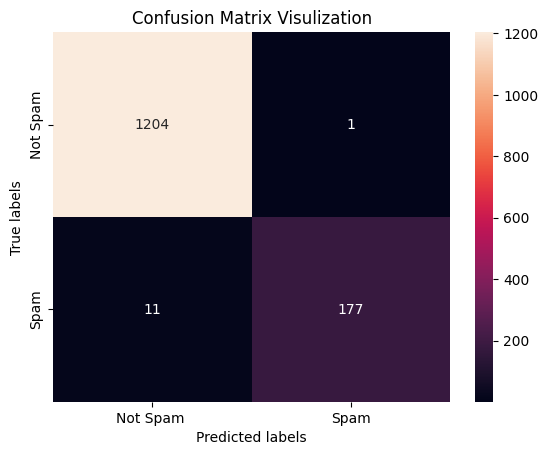

In [114]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test,y_pred)


sns.heatmap(cm,annot=True,fmt="d",xticklabels=['Not Spam ','Spam'],yticklabels=['Not Spam','Spam'])
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title('Confusion Matrix Visulization')

plt.show()


#### Prediction on Sample Emails

In [115]:
emails = [
    '''Dear Students,

Greetings from the Office of Dean Students' Welfare!



It gives me great pleasure to announce the Vice Chancellor Internship Scheme: Summer Internship 2025. Extending our initiative to achieve the objective of providing an internship programme which will intertwine academic knowledge and practical experience of research and administration, online applications are invited for the VCIS: Summer Internship 2025 (June-July 2025).

Eligibility: All bonafide regular students of University of Delhi studying in any course/stream at the undergraduate and postgraduate levels are eligible to apply for Internship programmes.

Final year/ Final Semester students of UG & PG are not eligible for the Summer internship.

Important Points:

1. Full-time Internship is for  20 hours per week. (Stipend Rs. 11025/- per month-).

2. Students who have already availed any VCIS (Summer/Part-time) are not eligible for VCIS: Summer Internship 2025.

3. The period of Full-time internship shall not exceed two (02) months under any circumstances from the time of joining.

4. Candidates must upload a Letter of Recommendation from their Principal/ Head of the Department/ Institution/ College/ Centres on the letterhead (duly stamped and signed). Registration form without the letter of recommendation from the competent authority will be rejected. (Refer to Annexure C, VCIS booklet) https://dsw.du.ac.in

5. A certificate from the Dean of Students Welfare at the end of the internship tenure, subject to the appraisal report from the concerned employing Department/ Centre/ Institute.

Candidates must bring the Letter of Recommendation from their Principal/ Head of the Department/ Institution/ College/ Centres on the letterhead (duly stamped and signed) during the interview for the Internship. The selection will be strictly based on the interview/Group Discussion and letter of recommendation.

Please visit the DSW website https://dsw.du.ac.in for the latest information.

You are requested to encourage students to register for the VCIS Internship Program through the Google form    https://forms.gle/UMwvRRxnvNedqnEHA



Kindly note that the last date for registration is April 30th , 2025.


For further queries and clarifications, you may contact Prof. Sangeeta Gadre (9811366656), Jt. Dean Students’ Welfare between 3:00pm-5:00pm.




The Poster & VCIS Booklet is attached herewith this mail for your ready reference and circulation.





Thanks & Regards

Prof. Ranjan Kumar Tripathi
Dean Students' Welfare
University of Delhi
Delhi-110007
--
You received this message because you are subscribed to the Google Groups "ANDC Ad-hoc faculty" group.
To unsubscribe from this group and stop receiving emails from it, send an email to andc-ad-hoc-faculty+unsubscribe@googlegroups.com.
To view this discussion visit https://groups.google.com/d/msgid/andc-ad-hoc-faculty/CALHea%2BO83Ufpz%2By4%2BqB9e4KqGsGGq-dFs89Frt2GxiZ67s2Sbg%40mail.gmail.com.


--
Acharya Narendra Dev College
(University of Delhi)
Govindpuri, Kalkaji,
New Delhi - 110019.
Ph:26294542


'''
]
emails_count = v.transform(emails)
model.predict(emails_count)
# emails_count

array(['ham'], dtype='<U4')

In [116]:
emails = [
    '''
    WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
'''
]
emails_count = v.transform(emails)
model.predict(emails_count)
# emails_count

array(['spam'], dtype='<U4')

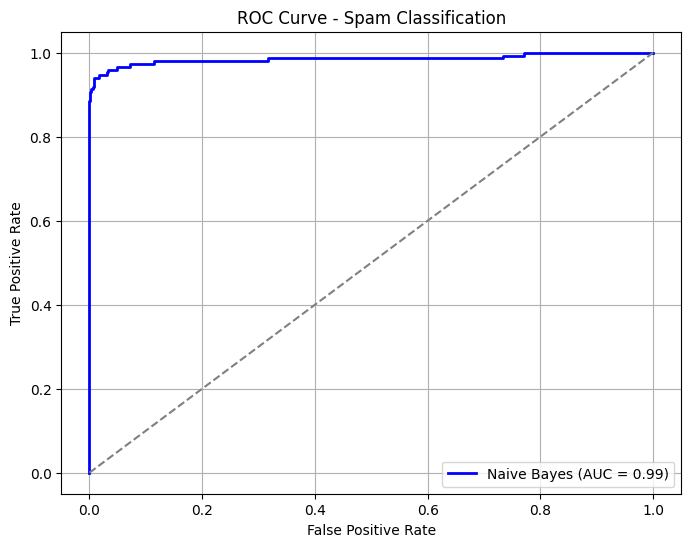

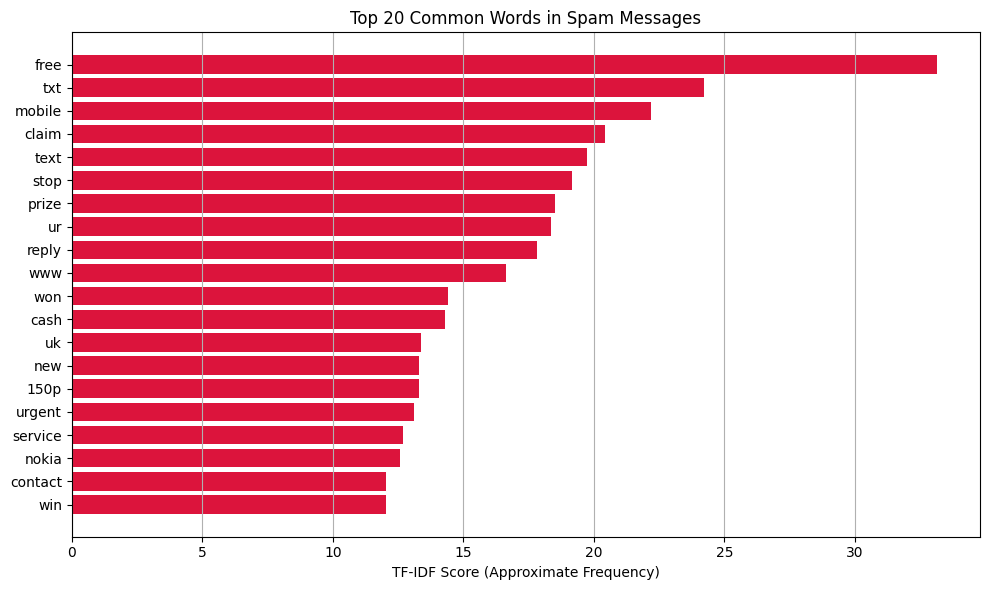

In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load and clean dataset
df = pd.read_csv("spam.csv", encoding='latin-1')[['Category', 'Message']]
df.columns = ['label', 'message']
df = df.dropna()
df['label'] = df['label'].map({'ham': 0, 'spam': 1})
df = df.dropna(subset=['label'])

# Step 2: Vectorize text using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['message'])
y = df['label']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Step 5: Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Step 6: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Step 7: Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Spam Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



# Step 8: Filter only spam messages
spam_messages = df[df['label'] == 1]['message']

# Step 9: Vectorize only spam messages using same TF-IDF vectorizer
spam_tfidf = tfidf.transform(spam_messages)

# Step 10: Sum TF-IDF values for each word across all spam messages
word_freq = np.asarray(spam_tfidf.sum(axis=0)).flatten()

# Step 11: Map words to their frequencies
vocab = tfidf.get_feature_names_out()
spam_freq_dict = dict(zip(vocab, word_freq))

# Step 12: Get top 20 common spam words
top_spam_words = sorted(spam_freq_dict.items(), key=lambda x: x[1], reverse=True)[:20]

# Step 13: Plot bar chart of top spam words
words, freqs = zip(*top_spam_words)

plt.figure(figsize=(10, 6))
plt.barh(words[::-1], freqs[::-1], color='crimson')
plt.xlabel('TF-IDF Score (Approximate Frequency)')
plt.title('Top 20 Common Words in Spam Messages')
plt.grid(axis='x')
plt.tight_layout()
plt.show()
